# Multiclass classification with scikit-learn

- digit dataset
  - Optical Recognition of Handwritten Digits Data Set
  - 손글씨로 쓴 숫자를 분류하는 데이터셋
  - MNIST가 원조, scikit-learn에서 8 by 8 image 제공

In [40]:
from sklearn import datasets

In [41]:
digit_dataset = datasets.load_digits()

In [42]:
digit_dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [43]:
print(digit_dataset["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [44]:
digit_dataset["data"]

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [45]:
digit_dataset["data"].shape

(1797, 64)

In [46]:
digit_dataset["target_names"]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [47]:
digit_dataset["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

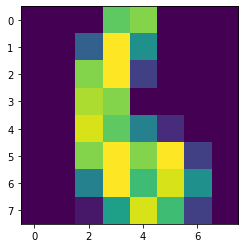

In [48]:
import matplotlib.pyplot as plt
plt.imshow(digit_dataset["images"][6])
plt.show()

In [49]:
X = digit_dataset["data"]
y = digit_dataset["target"]

In [50]:
X.shape, y.shape

((1797, 64), (1797,))

In [51]:
y[:100]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7,
       7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6,
       6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4,
       6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1])

- train-test split

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

- multinomial 방식으로 Logistic Regression을 할 때는 solver를 SGD보다 발전된 sag나 saga를 사용해야 함.

In [53]:
from sklearn.linear_model import LogisticRegression

logreg_ovr = LogisticRegression(multi_class = "ovr") # One-Vs-Rest 방식
logreg_softmax = LogisticRegression(multi_class = "multinomial", solver = "sag")

In [54]:
import warnings
warnings.filterwarnings(action='ignore')

In [55]:
logreg_ovr.fit(X_train, y_train)

LogisticRegression(multi_class='ovr')

In [56]:
logreg_softmax.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', solver='sag')

- One-Vs-Rest 방식으로 Predict

In [68]:
y_pred = logreg_ovr.predict(X_test)
y_true = y_test

In [69]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[37,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 40,  0,  1,  0,  0,  0,  0,  1,  0],
       [ 0,  2, 46,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 48,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 46,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 47,  0,  0,  1,  0],
       [ 0,  1,  0,  0,  0,  0, 41,  0,  0,  0],
       [ 0,  1,  0,  0,  1,  0,  0, 44,  0,  1],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 39,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 46]], dtype=int64)

In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.87      0.95      0.91        42
           2       1.00      0.96      0.98        48
           3       0.98      0.96      0.97        50
           4       0.98      0.98      0.98        47
           5       0.96      0.98      0.97        48
           6       0.98      0.98      0.98        42
           7       0.98      0.94      0.96        47
           8       0.93      0.95      0.94        41
           9       0.98      0.98      0.98        47

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.97      0.96      0.96       450



In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.9644444444444444

In [73]:
from sklearn.metrics import precision_score
precision_score(y_true, y_pred, average = "macro")

0.9648327218645706

- multinomial 방식으로 Predict

In [74]:
y_pred = logreg_softmax.predict(X_test)
y_true = y_test

accuracy_score(y_true, y_pred)

0.9622222222222222

In [75]:
from sklearn.metrics import precision_score
precision_score(y_true, y_pred, average = "macro")

0.9640535322656195

- Cross Validation Score
  - softmax방식이 좀 더 성능이 좋은 것을 알 수 있음

In [65]:
from sklearn.model_selection import cross_val_score

cross_val_score(logreg_ovr, X, y, scoring = "accuracy", cv = 20, n_jobs = 8).mean()

0.9442883895131085

In [66]:
cross_val_score(logreg_softmax, X, y, scoring = "accuracy", cv = 20, n_jobs = 8).mean()

0.9509862671660423

### OneVsRestClassifier

In [76]:
from sklearn.multiclass import OneVsRestClassifier
y_pred = OneVsRestClassifier(logreg_ovr).fit(X_train, y_train).predict(X_test)
y_true = y_test
accuracy_score(y_true, y_pred)

0.9644444444444444

In [78]:
# len : 10
OneVsRestClassifier(logreg_ovr).fit(X_train, y_train).estimators_

[LogisticRegression(multi_class='ovr'),
 LogisticRegression(multi_class='ovr'),
 LogisticRegression(multi_class='ovr'),
 LogisticRegression(multi_class='ovr'),
 LogisticRegression(multi_class='ovr'),
 LogisticRegression(multi_class='ovr'),
 LogisticRegression(multi_class='ovr'),
 LogisticRegression(multi_class='ovr'),
 LogisticRegression(multi_class='ovr'),
 LogisticRegression(multi_class='ovr')]

### OneVsOneClassifier

In [79]:
from sklearn.multiclass import OneVsOneClassifier
y_pred = OneVsOneClassifier(logreg_ovr).fit(X_train, y_train).predict(X_test)
y_true = y_test
accuracy_score(y_true, y_pred)

0.9822222222222222

In [81]:
# len : 45
len(OneVsOneClassifier(logreg_ovr).fit(X_train, y_train).estimators_)

45